1 Static Analysis

1.1 Descriptive Statistical Analysis

In [6]:
import pandas as pd

# Paths to the datasets
before_pandemic_path = 'C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_before_pandemic.csv'
during_pandemic_path = 'C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_during_pandemic.csv'
after_pandemic_path = 'C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_after_pandemic.csv'

# Function to calculate descriptive statistics for a given dataset
def calculate_descriptive_stats(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)
    
    # Calculate descriptive statistics for relevant columns
    stats = {
        #'Bike Stands': data['BIKE STANDS'].describe(),
        'Available Bike Stands': data['AVAILABLE BIKE STANDS'].describe(),
        'Available Bikes': data['AVAILABLE BIKES'].describe(),
        'Temperature': data['temp'].describe(),
        'Humidity': data['humidity'].describe(),
        'Windspeed': data['windspeed'].describe(),
        'Cloud Cover': data['cloudcover'].describe(),
        'Solar Radiation': data['solarradiation'].describe()
    }
    return pd.DataFrame(stats)

# Calculate and print the descriptive statistics for each period
stats_before = calculate_descriptive_stats(before_pandemic_path)
stats_during = calculate_descriptive_stats(during_pandemic_path)
stats_after = calculate_descriptive_stats(after_pandemic_path)

print("Descriptive Statistics Before Pandemic:")
print(stats_before)
print("\nDescriptive Statistics During Pandemic:")
print(stats_during)
print("\nDescriptive Statistics After Pandemic:")
print(stats_after)


Descriptive Statistics Before Pandemic:
       Available Bike Stands  Available Bikes   Temperature      Humidity  \
count           1.691115e+07     1.691115e+07  1.691115e+07  1.691115e+07   
mean            2.035766e+01     1.135287e+01  9.790937e+00  8.225520e+01   
std             1.215107e+01     1.113059e+01  4.201321e+00  6.631147e+00   
min             0.000000e+00     0.000000e+00  0.000000e+00  5.530000e+01   
25%             1.100000e+01     2.000000e+00  6.700000e+00  7.830000e+01   
50%             2.000000e+01     8.000000e+00  9.300000e+00  8.210000e+01   
75%             3.000000e+01     1.900000e+01  1.320000e+01  8.620000e+01   
max             5.600000e+01     4.300000e+01  2.070000e+01  9.890000e+01   

          Windspeed   Cloud Cover  Solar Radiation  
count  1.691115e+07  1.691115e+07     1.691115e+07  
mean   1.717137e+01  5.971722e+01     7.827422e+01  
std    5.882973e+00  1.567609e+01     6.482972e+01  
min    6.500000e+00  1.410000e+01     2.900000e+00  
2

1.2 Confusion Matrix

If we were to build a classification model, we would need a categorical target variable. For example, we could predict whether a bike station is likely to be full or empty (a binary classification)
For the sake of this example, let's assume we're predicting whether a station is "full" (no available bikes) or "not full" (at least one available bike). 

1. True Positives (TP): The number of times the model correctly predicts that a station is full.
2. True Negatives (TN): The number of times the model correctly predicts that a station is not full (there's at least one bike).
3. False Positives (FP): The number of times the model incorrectly predicts that a station is full (but there are bikes).
4. False Negatives (FN): The number of times the model incorrectly predicts that a station is not full when it is actually full.

        The top-left cell shows the TP count.
        The bottom-right cell shows the TN count.
        The top-right cell shows the FP count.
        The bottom-left cell shows the FN count.

Before Pandemic

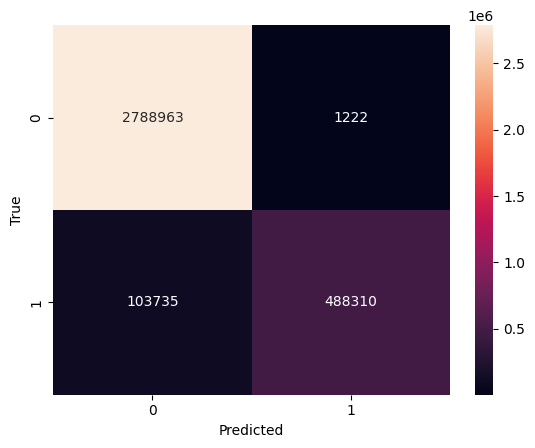

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load data, build a logistic regression model, and plot confusion matrix
def build_model_and_plot_confusion_matrix(before_pandemic_path):
    # Load the dataset
    data = pd.read_csv(before_pandemic_path)
    
    # Prepare the data for modeling
    # Assuming 'full' means 0 available bikes
    data['full'] = data['AVAILABLE BIKES'].apply(lambda x: 1 if x == 0 else 0)
    
    # Selecting some features that could be relevant for prediction
    features = ['BIKE STANDS', 'AVAILABLE BIKE STANDS', 'temp', 'humidity', 'windspeed', 'cloudcover', 'solarradiation']
    X = data[features]
    y = data['full']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Build model and plot confusion matrix for each period
build_model_and_plot_confusion_matrix(before_pandemic_path)


During Pandemic

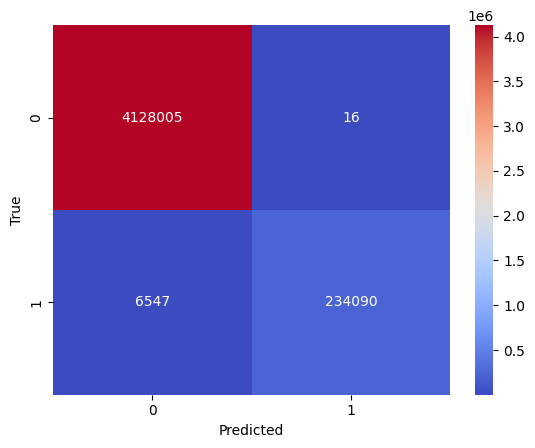

In [12]:
# Function to load data, build a logistic regression model, and plot confusion matrix
def build_model_and_plot_confusion_matrix(during_pandemic_path):
    # Load the dataset
    data = pd.read_csv(during_pandemic_path)
    
    # Prepare the data for modeling
    # Assuming 'full' means 0 available bikes
    data['full'] = data['AVAILABLE BIKES'].apply(lambda x: 1 if x == 0 else 0)
    
    # Selecting some features that could be relevant for prediction
    features = ['BIKE STANDS', 'AVAILABLE BIKE STANDS', 'temp', 'humidity', 'windspeed', 'cloudcover', 'solarradiation']
    X = data[features]
    y = data['full']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Build model and plot confusion matrix for each period
build_model_and_plot_confusion_matrix(during_pandemic_path)

After Pandemic

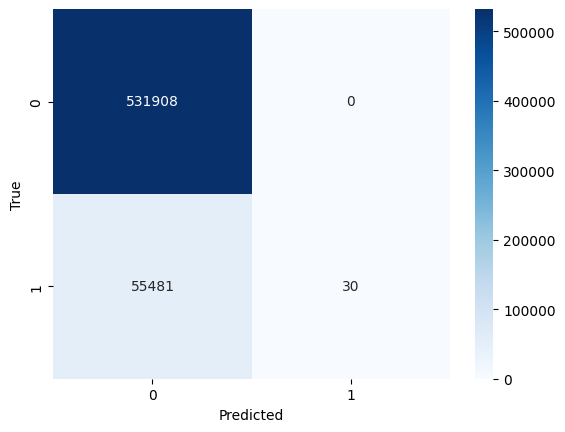

In [14]:
# Function to load data, build a logistic regression model, and plot confusion matrix
def build_model_and_plot_confusion_matrix(after_pandemic_path):
    # Load the dataset
    data = pd.read_csv(after_pandemic_path)
    
    # Prepare the data for modeling
    # Assuming 'full' means 0 available bikes
    data['full'] = data['AVAILABLE BIKES'].apply(lambda x: 1 if x == 0 else 0)
    
    # Selecting some features that could be relevant for prediction
    features = ['BIKE STANDS', 'AVAILABLE BIKE STANDS', 'temp', 'humidity', 'windspeed', 'cloudcover', 'solarradiation']
    X = data[features]
    y = data['full']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Build model and plot confusion matrix for each period
build_model_and_plot_confusion_matrix(after_pandemic_path)

1.3 Linear Regression Model

1. The scatter plot generated from the code represents the relationship between the actual and predicted values of available bikes from the 'after pandemic' dataset using a linear regression model. Here are the key elements of the plot and what they represent:

2. Data Points (Scatter Plot): Each point on the scatter plot represents an individual observation from the test dataset. The x-coordinate of a point corresponds to the actual number of available bikes (the true value), and the y-coordinate corresponds to the predicted number of available bikes (the value predicted by the model).

3. Diagonal Line (Perfect Prediction Line): The diagonal dashed line represents the line of perfect prediction. If a prediction is perfect, the actual and predicted values would be equal, placing the point along this line. The closer the points are to this line, the more accurate the predictions are.

4. Distribution of Points: The spread of the points around the diagonal line indicates the variance in the model's accuracy. Points that are far from the line represent predictions that are less accurate, whereas points that lie close to the line represent more accurate predictions.

5. Pattern of Points: If the points form a distinct pattern (e.g., a curve or a cluster away from the line), this may indicate systematic errors in the model's predictions. Such patterns could suggest that the model is not capturing some aspect of the relationship between the features and the target variable.

6. The Mean Squared Error (MSE) that would be printed out alongside the plot quantifies the average squared difference between the actual and predicted values, providing a single metric to evaluate the model's performance. A lower MSE value indicates a model that generally makes predictions closer to the actual values.

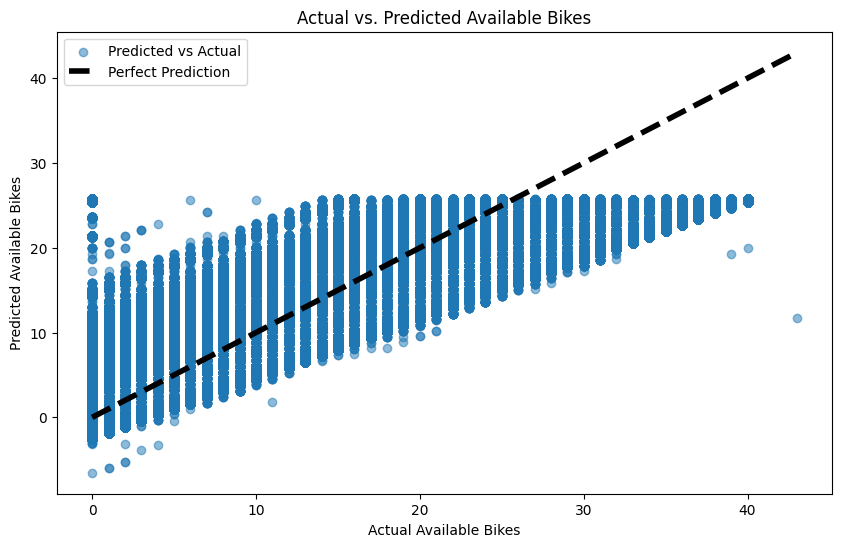

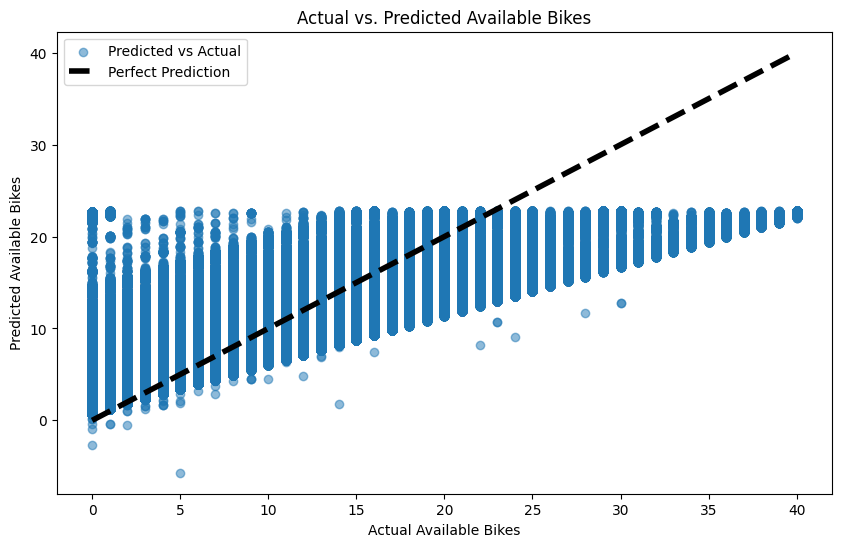

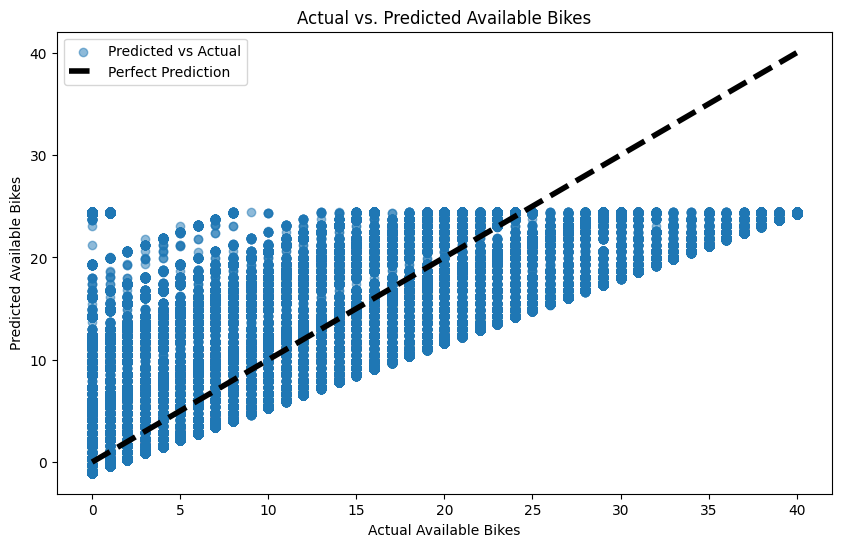

MSE for the model before the pandemic: 51.50286870220257
MSE for the model during the pandemic: 37.49676164407443
MSE for the model after the pandemic: 45.14030402279324


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Function to build and evaluate a linear regression model
def build_linear_regression_model(data, features, target):
    # Split the data into features (X) and target (y)
    X = data[features]
    y = data[target]
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the Linear Regression model
    model = LinearRegression()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Plotting the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, label='Perfect Prediction') # Line for perfect predictions
    plt.xlabel('Actual Available Bikes')
    plt.ylabel('Predicted Available Bikes')
    plt.title('Actual vs. Predicted Available Bikes')
    # Display the legend
    plt.legend()
    # Show the plot
    plt.show()
    
    # Evaluate the model using Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    return model, mse

# Define the features and the target variable
features = ['AVAILABLE BIKE STANDS', 'temp', 'humidity', 'windspeed', 'solarradiation']
target = 'AVAILABLE BIKES'

# Load the datasets
before_pandemic_data = pd.read_csv(before_pandemic_path)
during_pandemic_data = pd.read_csv(during_pandemic_path)
after_pandemic_data = pd.read_csv(after_pandemic_path)

# Build and evaluate models for each dataset
model_before_pandemic, mse_before_pandemic = build_linear_regression_model(before_pandemic_data, features, target)
model_during_pandemic, mse_during_pandemic = build_linear_regression_model(during_pandemic_data, features, target)
model_after_pandemic, mse_after_pandemic = build_linear_regression_model(after_pandemic_data, features, target)

# Print the Mean Squared Error for each model
print(f"MSE for the model before the pandemic: {mse_before_pandemic}")
print(f"MSE for the model during the pandemic: {mse_during_pandemic}")
print(f"MSE for the model after the pandemic: {mse_after_pandemic}")

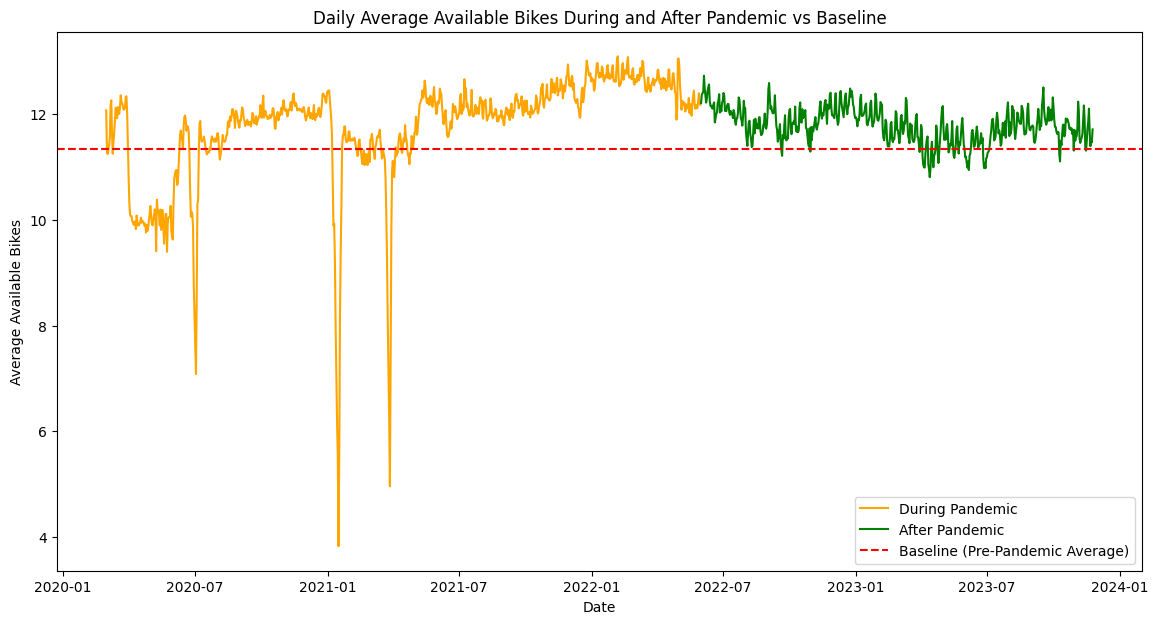

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data and calculate daily averages
def load_and_average(file_path):
    data = pd.read_csv(file_path, parse_dates=['DATE'])
    daily_avg = data.groupby(data['DATE'].dt.date)['AVAILABLE BIKES'].mean()
    return daily_avg

# Load the datasets
before_pandemic_data = pd.read_csv('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_before_pandemic.csv', parse_dates=['DATE'])
during_pandemic_data = load_and_average('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_during_pandemic.csv')
after_pandemic_data = load_and_average('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_after_pandemic.csv')

# Concatenate the during and after pandemic data
pandemic_data_combined = pd.concat([during_pandemic_data, after_pandemic_data])

# Calculate the baseline model as the mean of available bikes before the pandemic
baseline_available_bikes = before_pandemic_data['AVAILABLE BIKES'].mean()

# Plot the trends
plt.figure(figsize=(14, 7))

# During pandemic period
during_pandemic_data.plot(color='orange', label='During Pandemic')
# After pandemic period
after_pandemic_data.plot(color='green', label='After Pandemic')
# Baseline
plt.axhline(y=baseline_available_bikes, color='r', linestyle='--', label='Baseline (Pre-Pandemic Average)')

plt.title('Daily Average Available Bikes During and After Pandemic vs Baseline')
plt.xlabel('Date')
plt.ylabel('Average Available Bikes')
plt.legend()
plt.show()